# **Tugas Final Machine Learning**
- Nama: Muhammad Haerul
- NIM:  H071201033

# User Clustering for Anime Recomendation

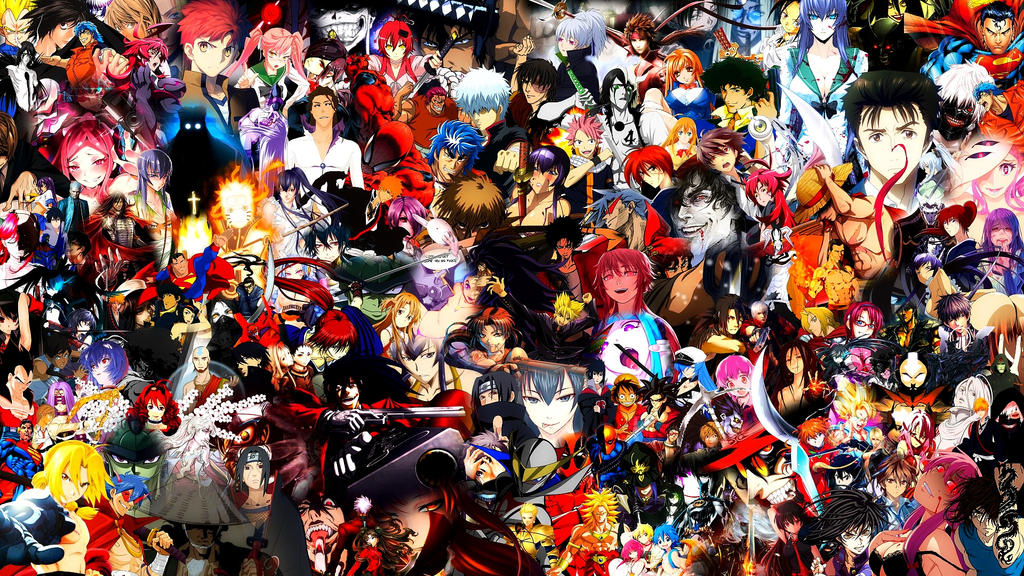

In [1]:
from IPython import display
display.Image("http://img02.deviantart.net/42b7/i/2015/092/1/2/ultimate_anime_world_cup_by_cristyann-d8o38t3.jpg")

## Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.filterwarnings("ignore")

## Data Exploration

In [3]:
anime = pd.read_csv('anime.csv')

In [4]:
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [5]:
print(anime.shape)

(12294, 7)


In [6]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [7]:
user = pd.read_csv('rating.csv')

In [8]:
user

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [9]:
user.shape

(7813737, 3)

In [10]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


## Data Visualization

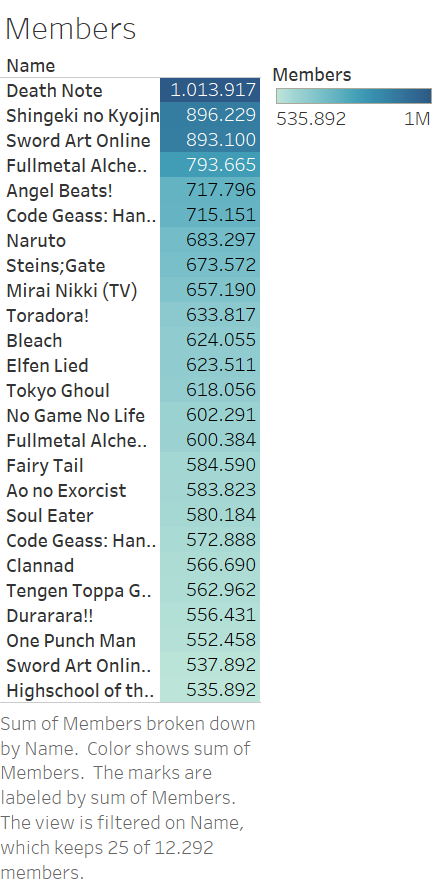

In [4]:
#Anime members
display.Image("https://raw.githubusercontent.com/muhammadhaerul25/Data-Visualization/main/Tableau/Anime%20Recomendation/result/Members.png")

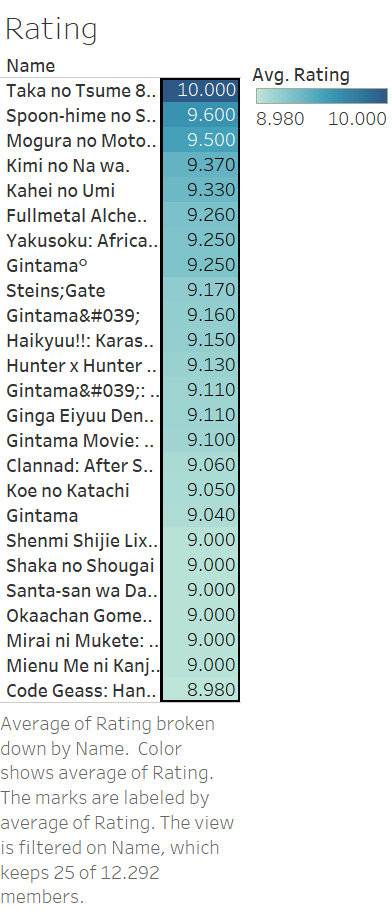

In [5]:
#Anime rating
display.Image('https://raw.githubusercontent.com/muhammadhaerul25/Data-Visualization/main/Tableau/Anime%20Recomendation/result/Rating.png')

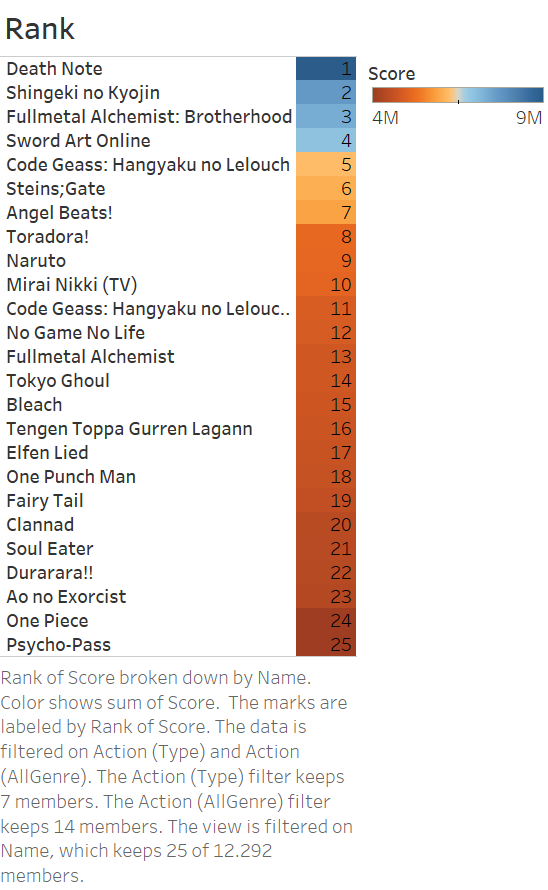

In [7]:
#Anime Rank
display.Image('https://raw.githubusercontent.com/muhammadhaerul25/Data-Visualization/main/Tableau/Anime%20Recomendation/result/Rank.png')

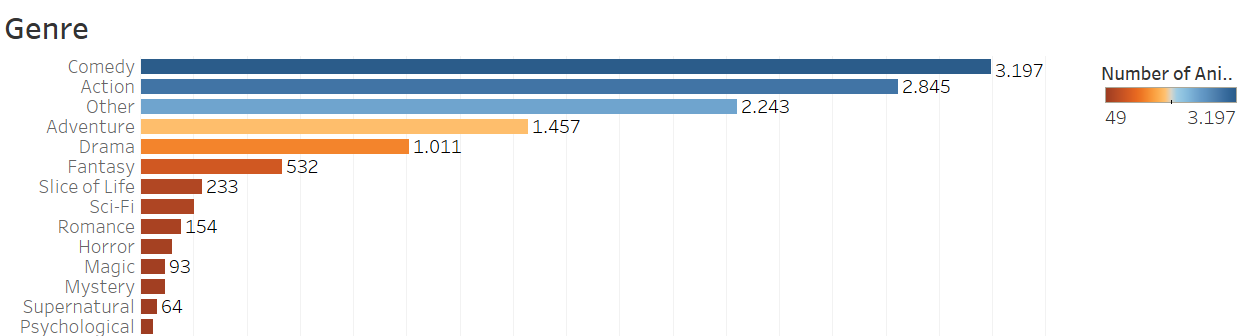

In [8]:
#Anime Genre
display.Image('https://raw.githubusercontent.com/muhammadhaerul25/Data-Visualization/main/Tableau/Anime%20Recomendation/result/Genre.png')

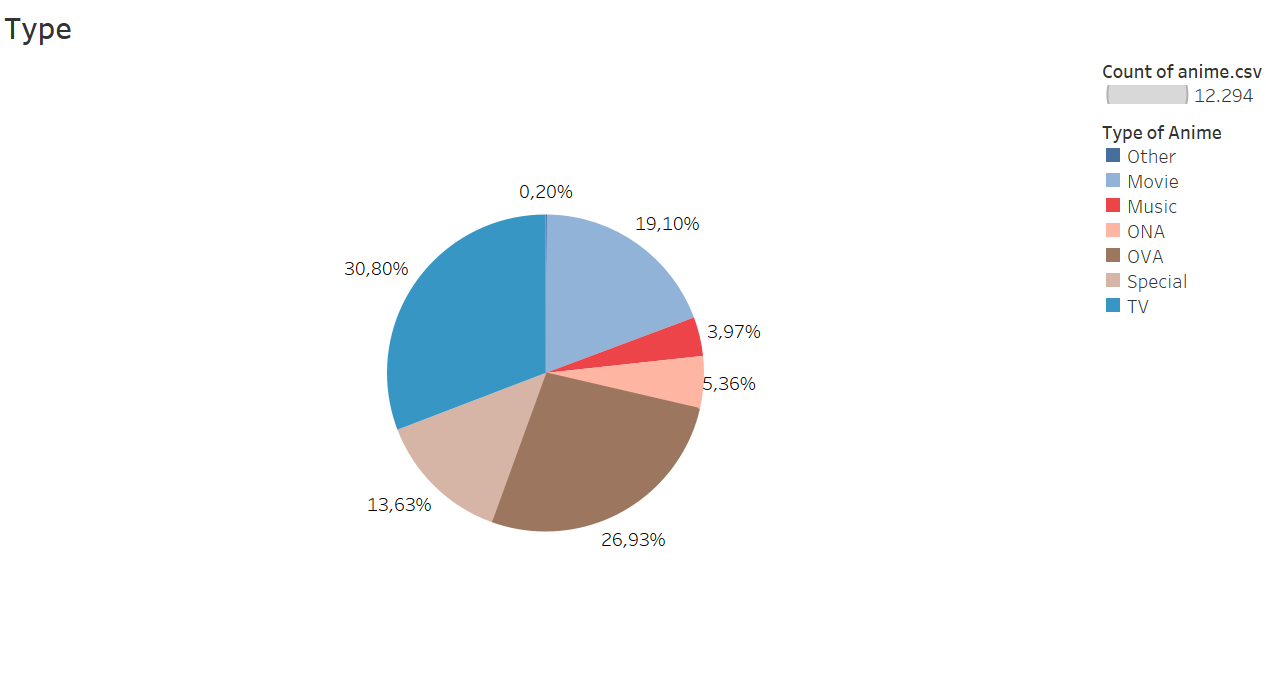

In [9]:
#Anime Type
display.Image('https://raw.githubusercontent.com/muhammadhaerul25/Data-Visualization/main/Tableau/Anime%20Recomendation/result/Type.png')

**Link Visualization Dashboard:**

https://public.tableau.com/app/profile/muhammad.haerul/viz/AnimeRecomendationDashboard/AnimeRecomendation

## Feature Engineering

### Rating

**Definition of Rating**

Because of many users, many differences criteria for rating anime.
Then, I decide to find rating mean of each user.
Anime which got rating higher than user rating mean will assign as like

In [11]:
# User 1 has a negative in rating mean
user[user['user_id']==1].rating.mean()

-0.7124183006535948

In [12]:
# User 2 has a very low in rating mean
user[user['user_id']==2].rating.mean()

2.6666666666666665

In [13]:
# Rating mean of user 5 is very close to 5 which is half of max rating
user[user['user_id']==5].rating.mean()

4.263383297644539

**Calculate mean rating per user**

In [14]:
MRPU = user.groupby(['user_id']).mean().reset_index()
MRPU['mean_rating'] = MRPU['rating']
MRPU.drop(['anime_id','rating'],axis=1, inplace=True)

In [15]:
MRPU

,user_id,mean_rating
0,1,-0.712418
1,2,2.666667
2,3,7.382979
3,4,-1.000000
4,5,4.263383
...,...,...
73510,73512,7.846154
73511,73513,7.515152
73512,73514,10.000000
73513,73515,7.719388


In [16]:
user = pd.merge(user, MRPU, on=['user_id','user_id'])

In [17]:
user

,user_id,anime_id,rating,mean_rating
0,1,20,-1,-0.712418
1,1,24,-1,-0.712418
2,1,79,-1,-0.712418
3,1,226,-1,-0.712418
4,1,241,-1,-0.712418
...,...,...,...,...
7813732,73515,16512,7,7.719388
7813733,73515,17187,9,7.719388
7813734,73515,22145,10,7.719388
7813735,73516,790,9,9.000000


In [18]:
user = user.drop(user[user.rating < user.mean_rating].index)

In [19]:
user

,user_id,anime_id,rating,mean_rating
47,1,8074,10,-0.712418
81,1,11617,10,-0.712418
83,1,11757,10,-0.712418
101,1,15451,10,-0.712418
153,2,11771,10,2.666667
...,...,...,...,...
7813730,73515,13659,8,7.719388
7813733,73515,17187,9,7.719388
7813734,73515,22145,10,7.719388
7813735,73516,790,9,9.000000


In [29]:
print(user.shape)

(4262566, 4)


In [25]:
# 3 anime were assigned as user 1 favorite anime
user[user['user_id']== 1]

,user_id,anime_id,rating,mean_rating
47,1,8074,10,-0.712418
81,1,11617,10,-0.712418
83,1,11757,10,-0.712418
101,1,15451,10,-0.712418


In [26]:
# user2 favorite only one anime
user[user['user_id']== 2]

,user_id,anime_id,rating,mean_rating
153,2,11771,10,2.666667


In [28]:
user[user['user_id']== 5]

,user_id,anime_id,rating,mean_rating
302,5,6,8,4.263383
303,5,15,6,4.263383
304,5,17,6,4.263383
305,5,18,6,4.263383
306,5,20,6,4.263383
...,...,...,...,...
762,5,30831,8,4.263383
763,5,31240,8,4.263383
765,5,31722,7,4.263383
767,5,32182,9,4.263383


In [33]:
user["user_id"].value_counts()

48766    10227
45659     1766
57620     1678
42635     1672
10283     1629
         ...  
35097        1
35095        1
19041        1
69914        1
22059        1
Name: user_id, Length: 73515, dtype: int64

In [40]:
user = user.rename({'rating':'userRating'}, axis='columns')

In [41]:
user = user.rename({'userRating':'user_rating'}, axis='columns')

In [42]:
user

,user_id,anime_id,user_rating,mean_rating
47,1,8074,10,-0.712418
81,1,11617,10,-0.712418
83,1,11757,10,-0.712418
101,1,15451,10,-0.712418
153,2,11771,10,2.666667
...,...,...,...,...
7813730,73515,13659,8,7.719388
7813733,73515,17187,9,7.719388
7813734,73515,22145,10,7.719388
7813735,73516,790,9,9.000000


### Combine two datasets

In [43]:
# merge 2 dataset
mergedata = pd.merge(anime,user,on=['anime_id','anime_id'])
mergedata= mergedata[mergedata.user_id <= 20000]
mergedata

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating,mean_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,7.699301
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,8.729242
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,7.372287
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10,8.356322
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10,-0.832298
...,...,...,...,...,...,...,...,...,...,...
4262448,3910,Kyuukyoku no Sex Adventure Kamasutra,"Action, Comedy, Hentai, Romance, Supernatural",OVA,1,5.08,835,15721,9,6.512000
4262455,4601,Fairy Forest Remi-chan,Hentai,OVA,1,5.04,1060,8446,-1,-1.000000
4262464,5545,Heisei Jogakuen Kagai Lesson,Hentai,OVA,1,5.00,503,11048,-1,-1.000000
4262494,2240,Sei Michaela Gakuen Hyouryuuki II,Hentai,OVA,2,4.80,457,17649,6,5.686567


In [44]:
len(anime['anime_id'].unique())

12294

In [45]:
len(mergedata['anime_id'].unique())

7852

In [49]:
len(mergedata['user_id'].unique())

20000

### Create Crosstable

Show detail of anime which each user like

In [46]:
user_anime = pd.crosstab(mergedata['user_id'], mergedata['name'])
user_anime

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Principal Component Analysis

   Principal Component Analysis converts our original variables to a new set of variables, which are a linear combination of the original set of variables. The goal is to reduce dimension of data for clustering and visualize

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(user_anime)
pca_samples = pca.transform(user_anime)

In [56]:
ps = pd.DataFrame(pca_samples)
ps

,0,1,2
0,-1.579129,-0.500240,0.415769
1,-1.773553,-0.272593,0.116390
2,0.218814,-1.232282,-0.985790
3,0.199435,-0.291005,0.681051
4,3.532125,-0.184796,-0.743318
...,...,...,...
19995,-1.514955,-0.161691,0.339522
19996,-1.695818,-0.080439,0.237513
19997,-1.111682,0.007395,-0.278286
19998,2.193319,-0.976928,1.510626


In [57]:
tocluster = pd.DataFrame(ps[[0,1,2]])

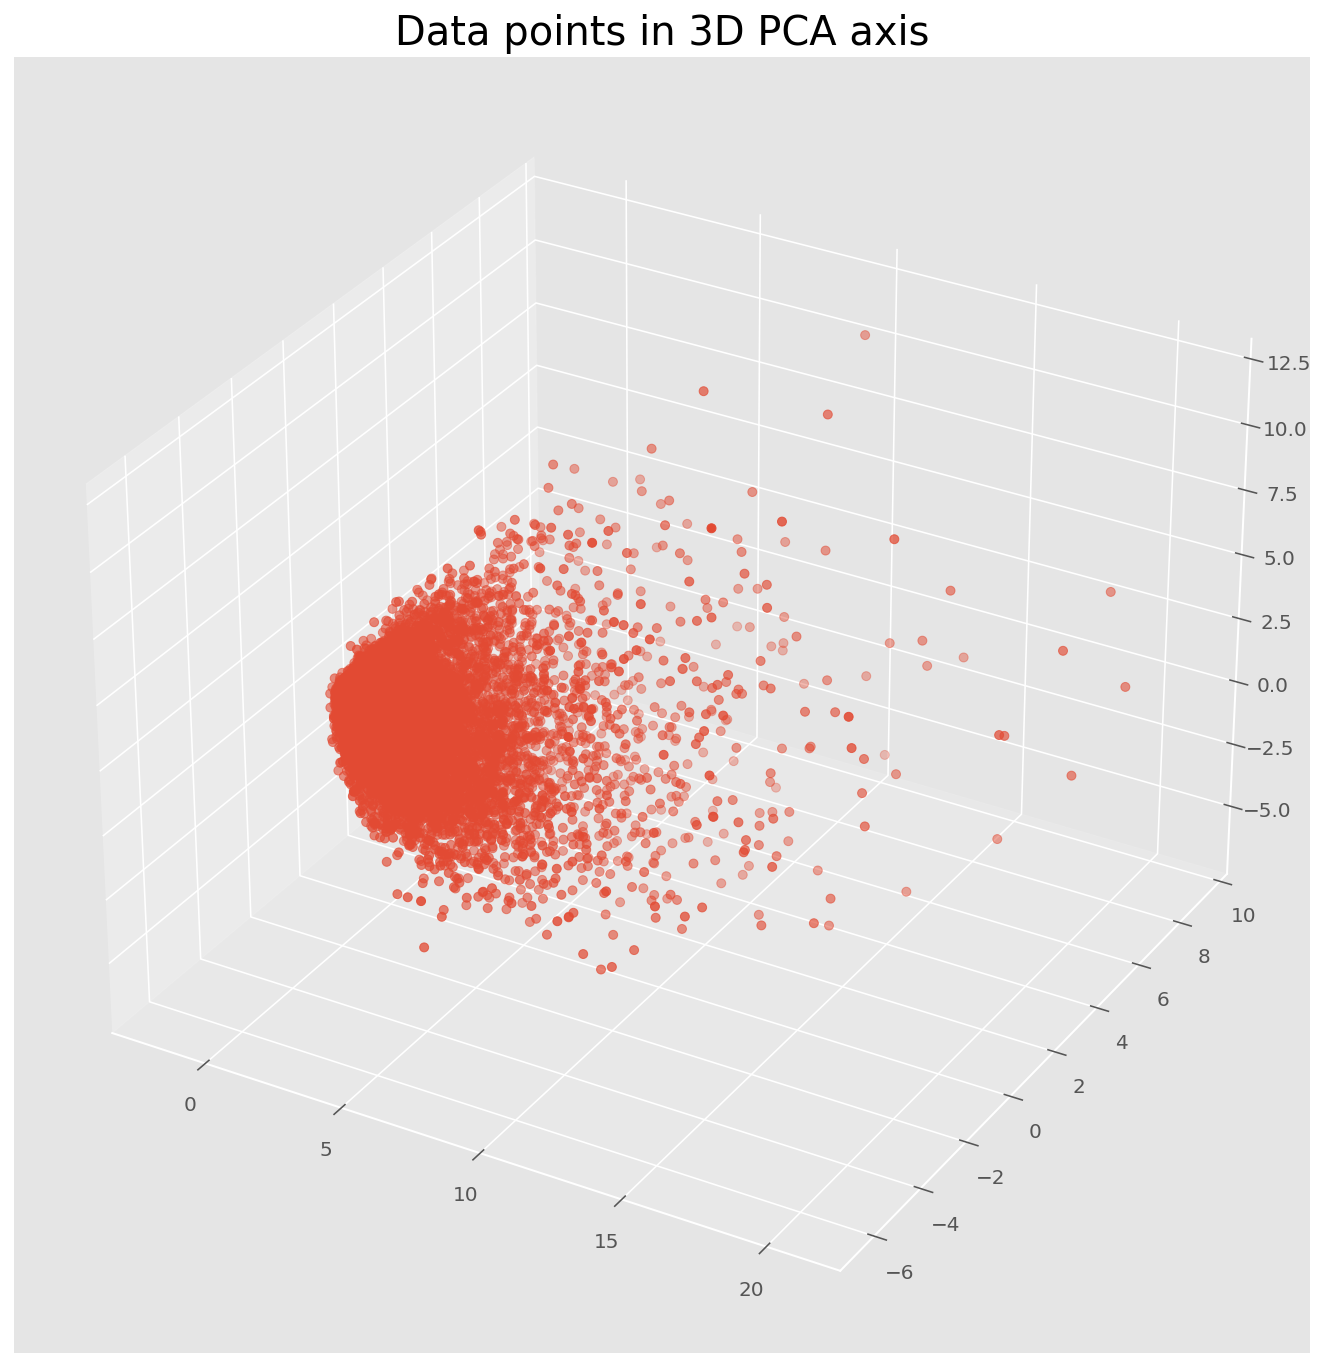

In [71]:
plt.rcParams['figure.figsize'] = (16, 9)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

In [72]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
inertia_list = np.empty(8)

for i in range(2,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tocluster)
    inertia_list[i] = kmeans.inertia_
    scores.append(silhouette_score(tocluster, kmeans.labels_))

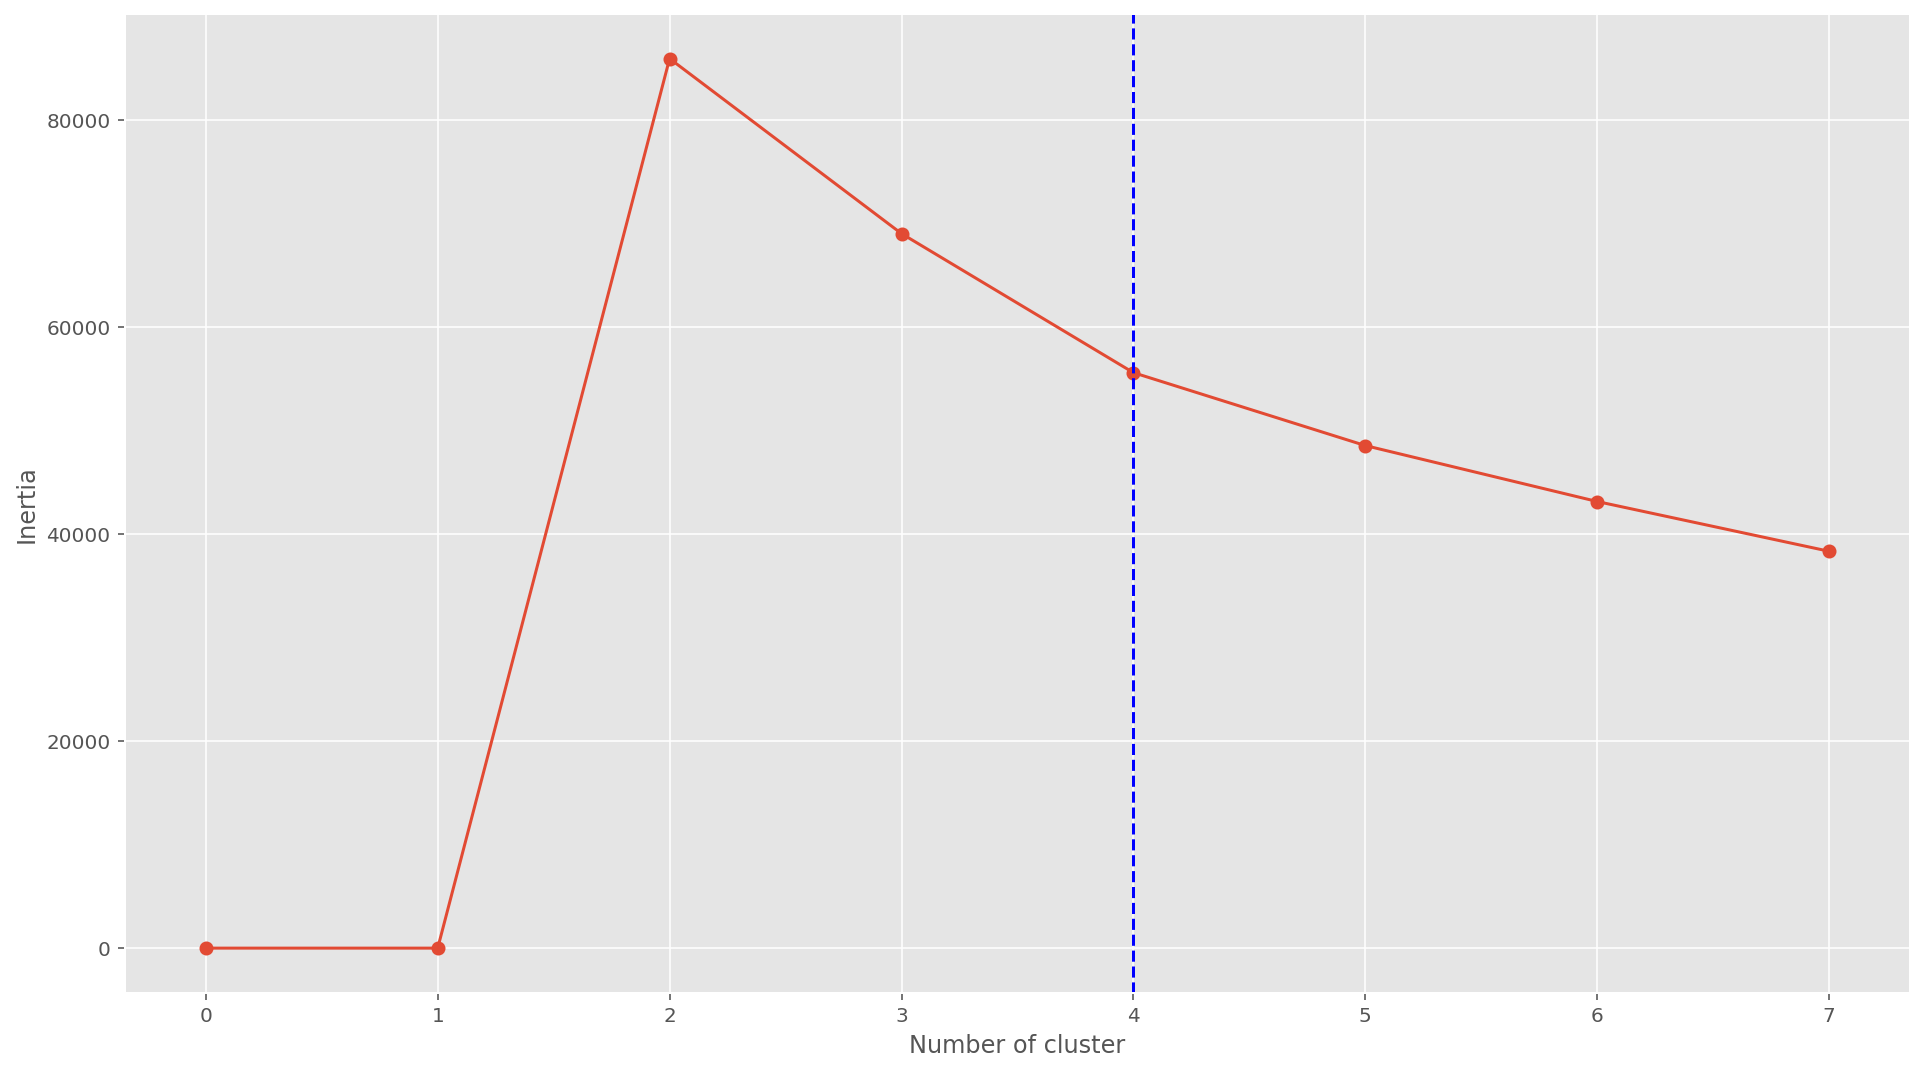

In [73]:
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Inertia')
plt.show()

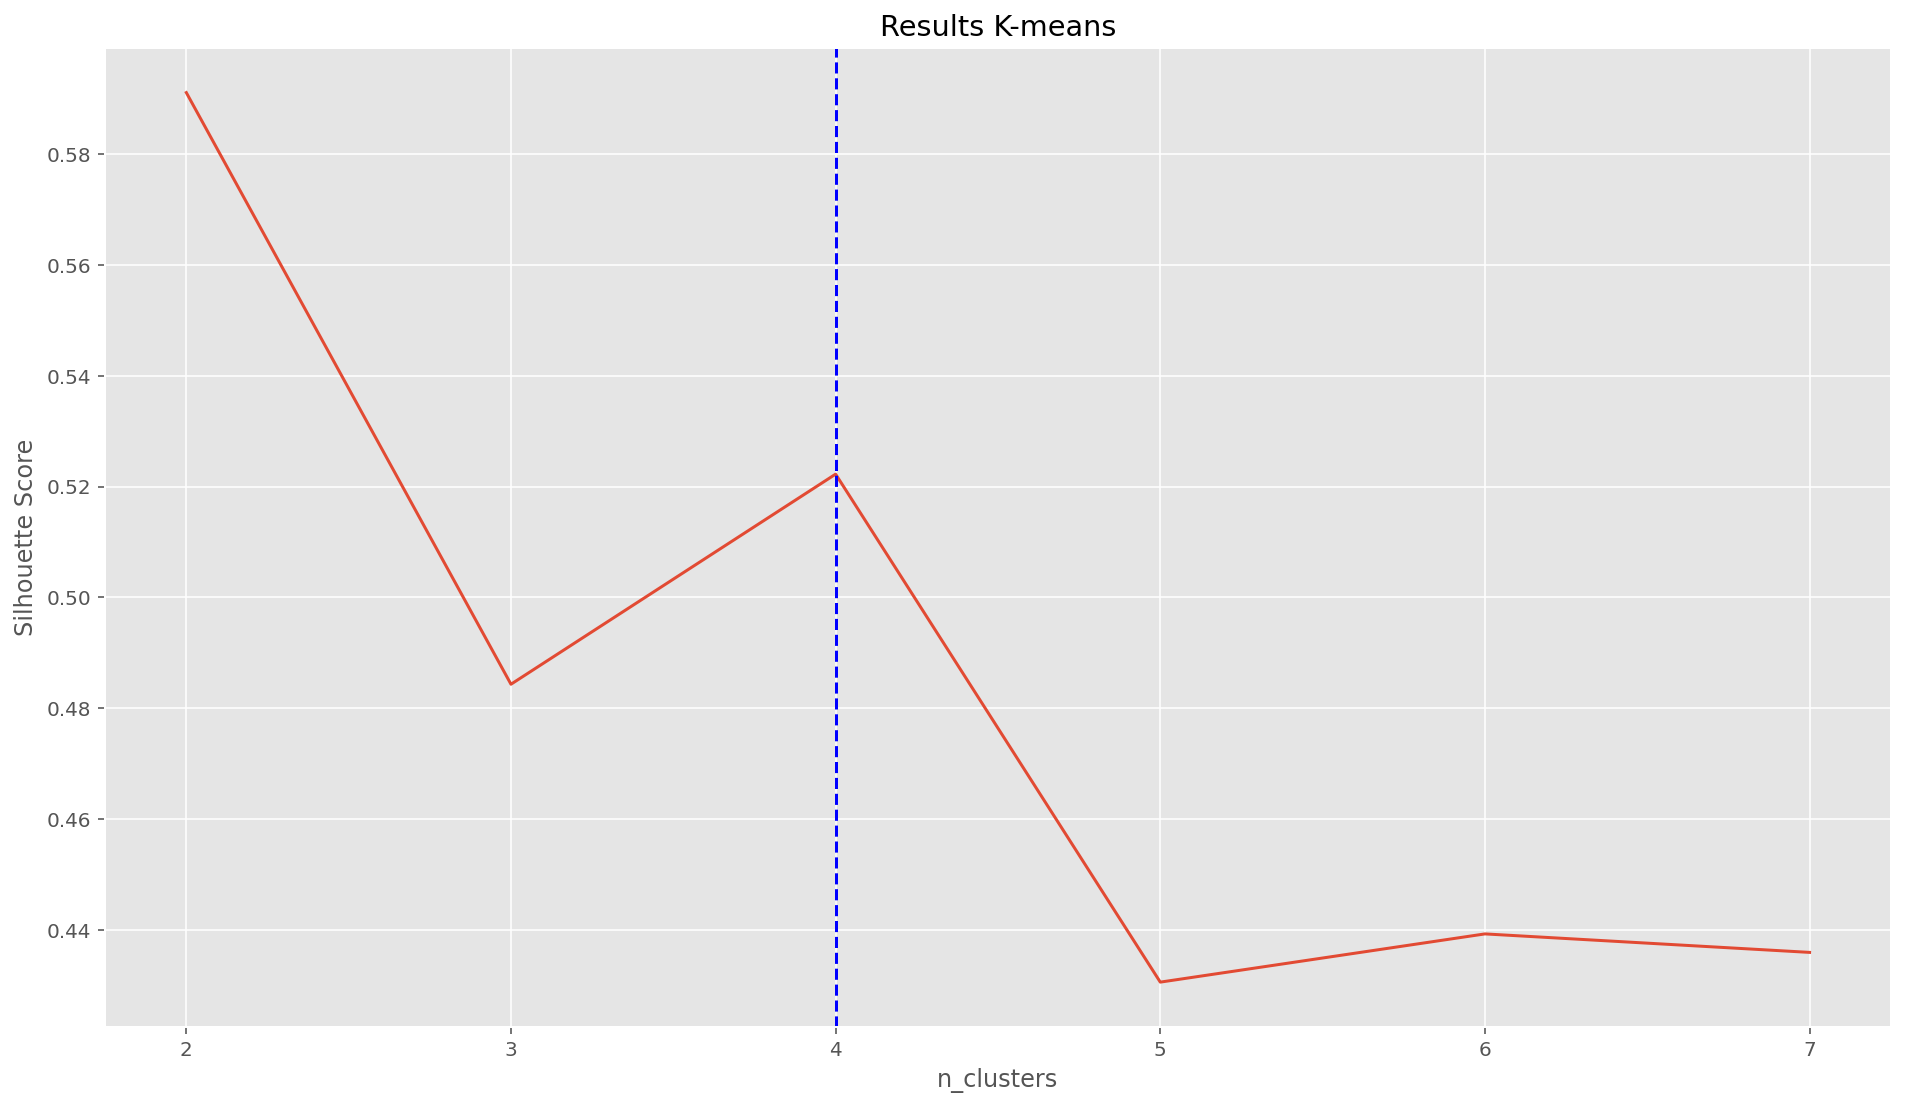

In [78]:
plt.plot(range(2,8), scores);
plt.title('Results K-means')
plt.xlabel('n_clusters');
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Silhouette Score');
plt.show()

## Clustering

### K-means Clustering

In [75]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=4,random_state=30).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

print(centers)

[[-1.08874971 -0.04026583  0.06666477]
 [ 7.61700382 -0.64256847  0.83955762]
 [ 1.6784451   2.31533837 -0.0252276 ]
 [ 1.97875213 -1.12654221 -0.43514801]]


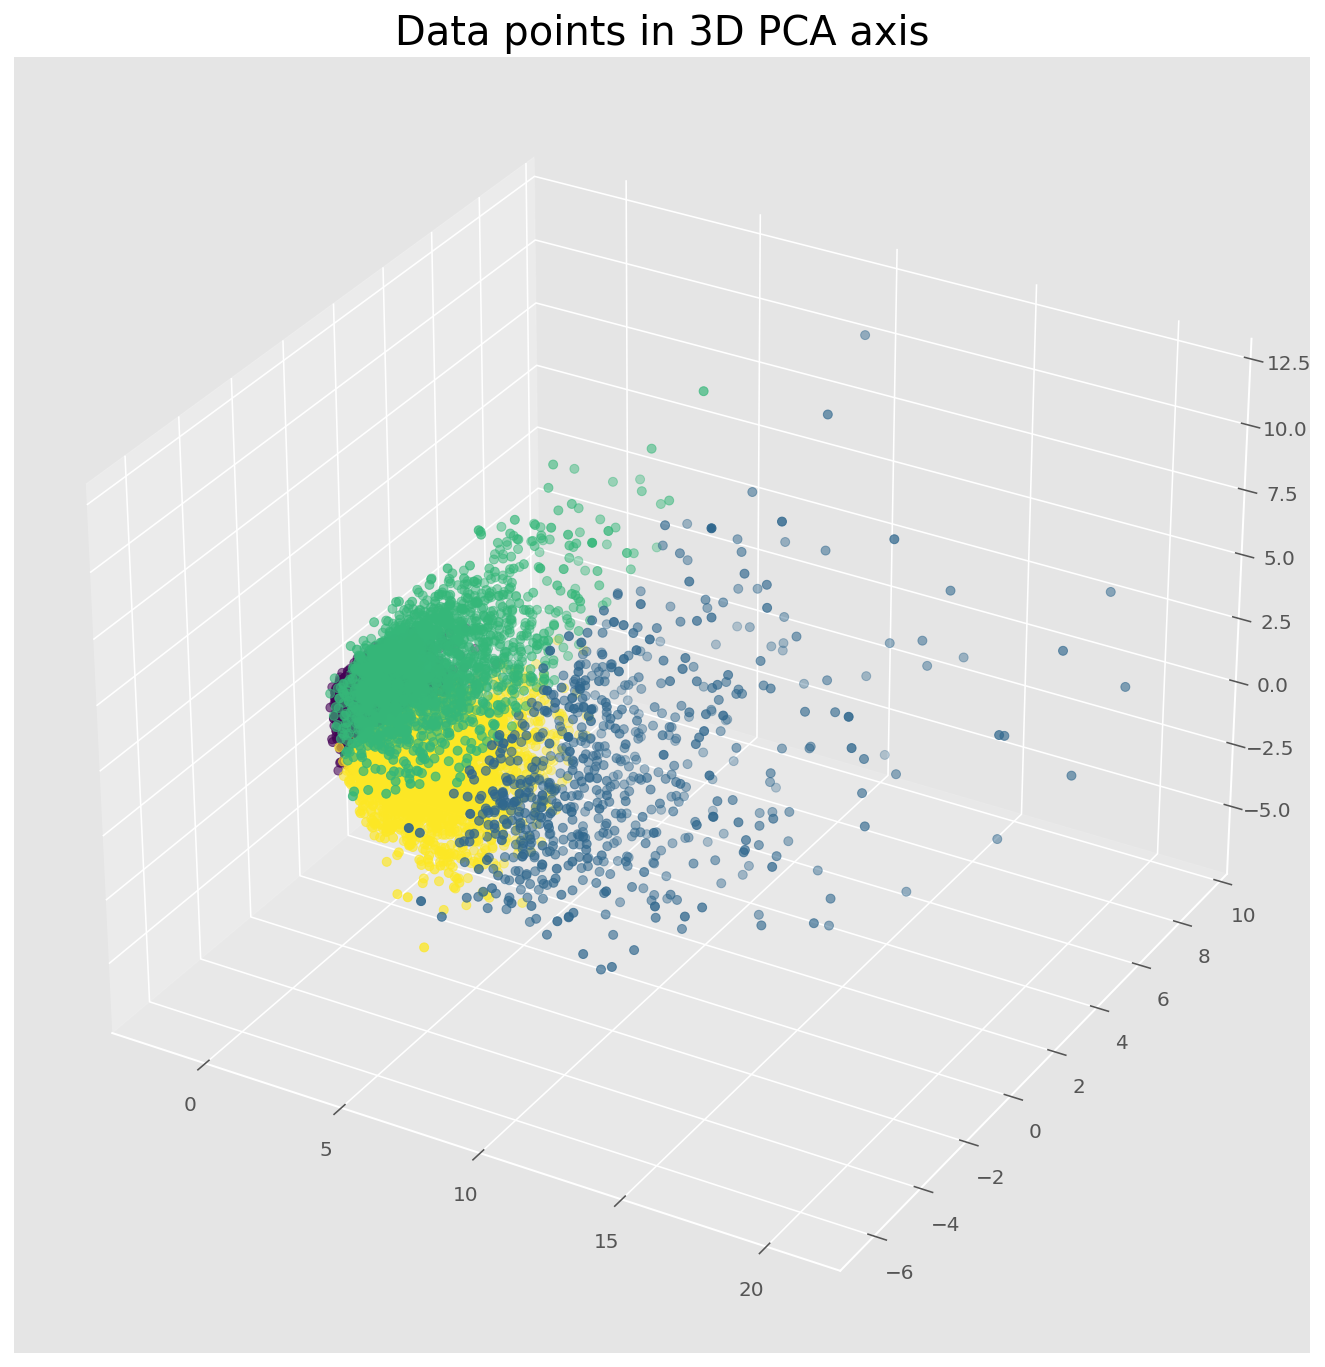

In [76]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1], c = c_preds)
plt.title('Data points in 3D PCA axis', fontsize=20)

plt.show()

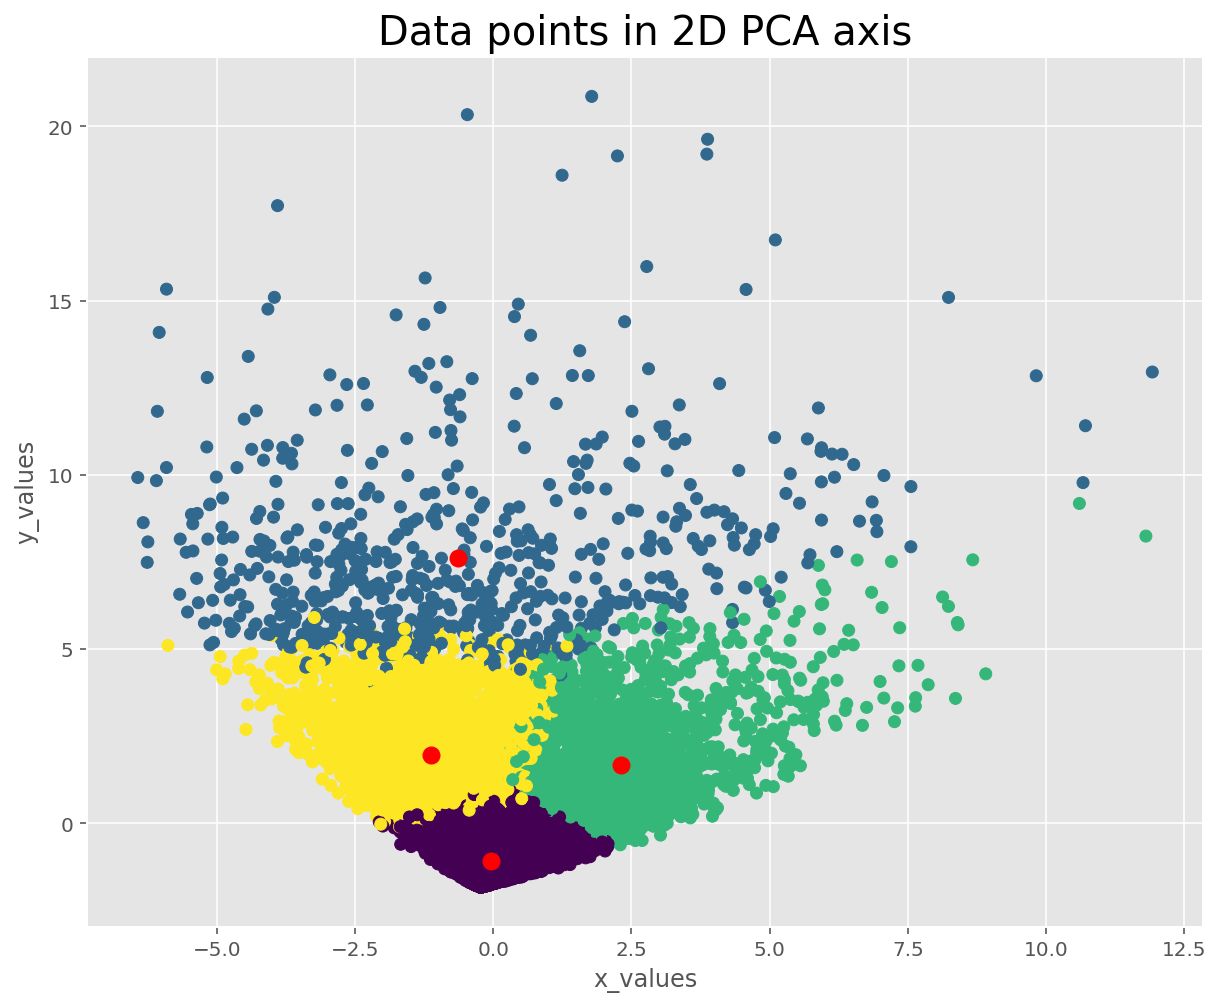

In [79]:
fig = plt.figure(figsize=(10,8))
plt.scatter(tocluster[1],tocluster[0],c = c_preds)
for ci,c in enumerate(centers):
    plt.plot(c[1], c[0], 'o', markersize=8, color='red', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize=20)
plt.show()

In [81]:
user_anime['cluster'] = c_preds
user_anime

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
user_anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Columns: 7853 entries, &quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi to cluster
dtypes: int32(1), int64(7852)
memory usage: 1.2 GB


### Characteristic of Each Cluster

In [85]:
c0 = user_anime[user_anime['cluster']==0].drop('cluster',axis=1).mean()
c1 = user_anime[user_anime['cluster']==1].drop('cluster',axis=1).mean()
c2 = user_anime[user_anime['cluster']==2].drop('cluster',axis=1).mean()
c3 = user_anime[user_anime['cluster']==3].drop('cluster',axis=1).mean()

Top 15 anime which will explain characteristic of this cluster

In [88]:
def createAnimeInfoList(animelist):
    episode_list = list()
    genre_list = list()
    member_list = list()
    rating_list= list()
    for x in anime['name']:
        if x in animelist:
            episode_list.append(anime[anime['name']==x].episodes.values.astype(int))
            member_list.append(anime[anime['name']==x].members.values.astype(int))
            rating_list.append(anime[anime['name']==x].rating.values.astype(int))
            for y in anime[anime['name']==x].genre.values:
                 genre_list.append(y)
    return genre_list,episode_list,rating_list,member_list

In [89]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split(','):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [96]:
from wordcloud import WordCloud

def makeCloud(Dict,name,color):
    words = dict()

    for s in Dict:
        words[s[0]] = s[1]

        wordcloud = WordCloud(
                      width=1500,
                      height=500, 
                      background_color=color, 
                      max_words=20,
                      max_font_size=500, 
                      normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)

    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

#### Cluster 0

In [87]:
c0.sort_values(ascending=False)[0:15]

name
Death Note                            0.320642
Shingeki no Kyojin                    0.230444
Sword Art Online                      0.198824
Fullmetal Alchemist: Brotherhood      0.181616
Code Geass: Hangyaku no Lelouch       0.178820
Sen to Chihiro no Kamikakushi         0.159963
Angel Beats!                          0.157095
Fullmetal Alchemist                   0.155661
Code Geass: Hangyaku no Lelouch R2    0.153510
Naruto                                0.146125
Elfen Lied                            0.144045
Ouran Koukou Host Club                0.133792
Mirai Nikki (TV)                      0.121388
Toradora!                             0.117803
Howl no Ugoku Shiro                   0.114433
dtype: float64

In [92]:
set_keywords = set()
for liste_keywords in data['genre'].str.split(',').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)

In [91]:
animelist = list(c0.index)
data = pd.DataFrame()
data['genre'],data['episode'],data['rating'],data['member'] = createAnimeInfoList(animelist)

**Favorite genre for this cluster**

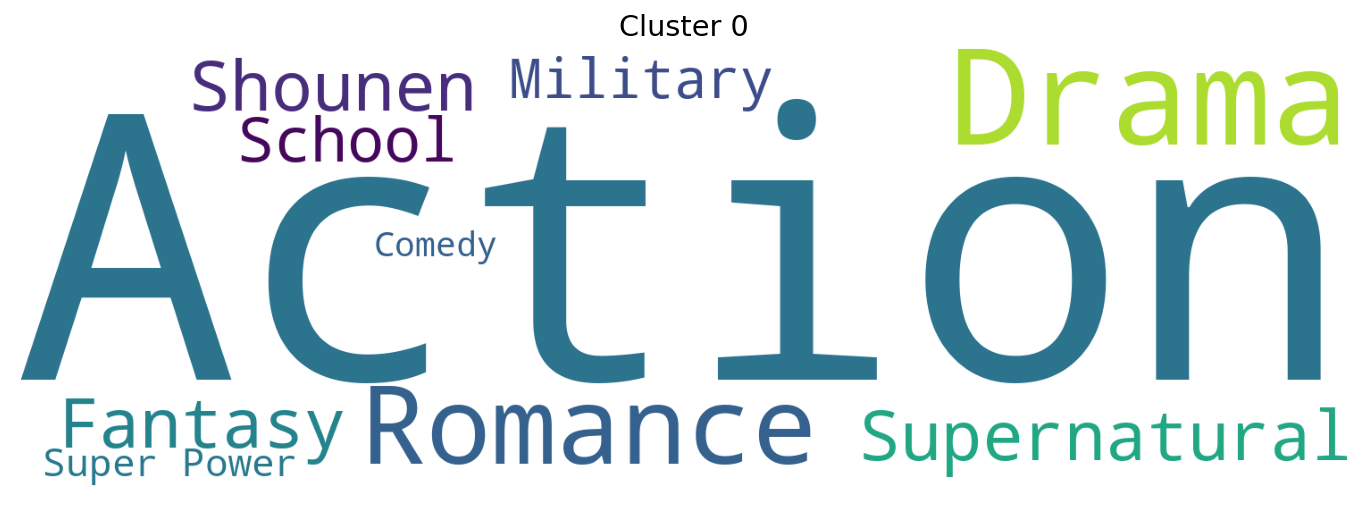

In [100]:
c0_animelist = list(c0.sort_values(ascending=False)[0:15].index)
c0_data = pd.DataFrame()
c0_data['genre'],c0_data['episode'],c0_data['rating'],c0_data['member'] =  createAnimeInfoList(c0_animelist)
c0_data.iloc[:,1:4] = c0_data.iloc[:,1:4].astype(int) # change to numeric object to integer
keyword_occurences, dum = count_word(c0_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"Cluster 0","white")

In [104]:
keyword_occurences[0:5]

[['Action', 10],
 [' Drama', 8],
 [' Romance', 5],
 [' Supernatural', 5],
 [' Shounen', 5]]

Average of each information for anime which user in this cluster like

In [106]:
print('Cluster 0\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c0_data['episode'].mean(), c0_data['rating'].mean(),c0_data['member'].mean()))

Cluster 0
AVG episode : 38.46666666666667
AVG movie rating : 7.866666666666666
AVG member : 668177.0666666667


#### Cluster 1

In [107]:
c1.sort_values(ascending=False)[0:15]

name
Angel Beats!                                           0.836524
No Game No Life                                        0.818851
Toradora!                                              0.815906
Code Geass: Hangyaku no Lelouch                        0.804124
Steins;Gate                                            0.792342
Shingeki no Kyojin                                     0.783505
Code Geass: Hangyaku no Lelouch R2                     0.777614
Sword Art Online                                       0.768778
Bakemonogatari                                         0.756996
Death Note                                             0.755523
Hataraku Maou-sama!                                    0.730486
Fullmetal Alchemist: Brotherhood                       0.730486
Clannad                                                0.724595
Yahari Ore no Seishun Love Comedy wa Machigatteiru.    0.720177
Chuunibyou demo Koi ga Shitai!                         0.718704
dtype: float64

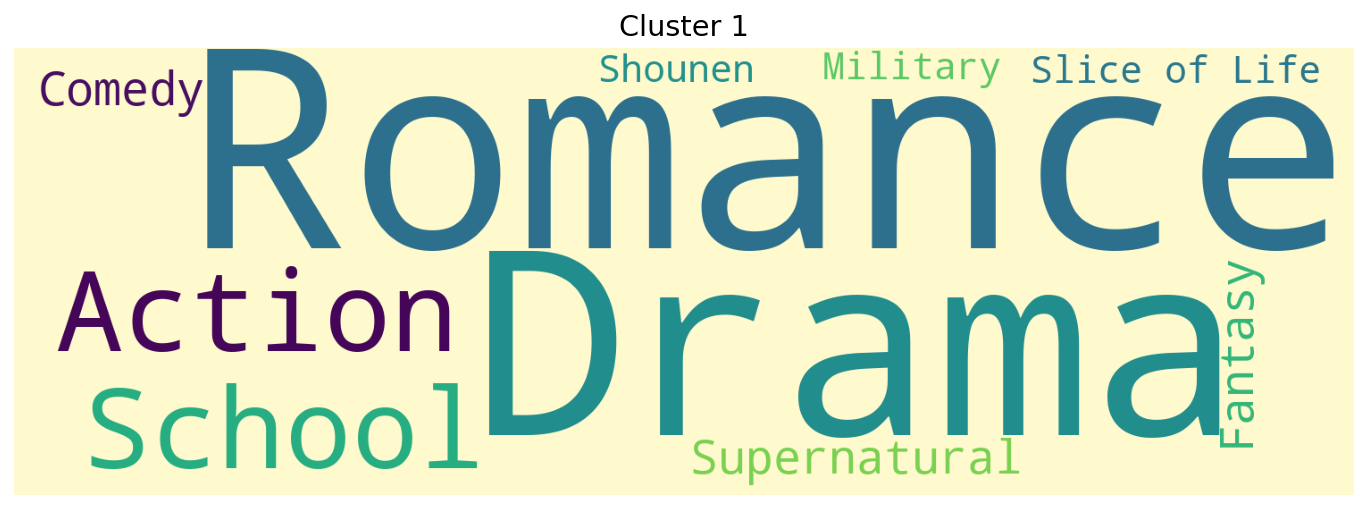

In [110]:
c1_animelist = list(c1.sort_values(ascending=False)[0:15].index)
c1_data = pd.DataFrame()
c1_data['genre'],c1_data['episode'],c1_data['rating'],c1_data['member'] =  createAnimeInfoList(c1_animelist)
c1_data.iloc[:,1:4] = c1_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c1_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"Cluster 1","lemonchiffon")

In [111]:
keyword_occurences[0:5]

[[' Romance', 7],
 [' Drama', 7],
 [' School', 6],
 ['Action', 6],
 [' Supernatural', 5]]

Average of each information for anime which user in this cluster like

In [114]:
print('Cluster 1\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c1_data['episode'].mean(), c1_data['rating'].mean(),c1_data['member'].mean()))

Cluster 1
AVG episode : 23.4
AVG movie rating : 8.0
AVG member : 647913.0666666667


#### Cluster 2

In [115]:
c2.sort_values(ascending=False)[0:15]

name
Death Note                            0.680644
Code Geass: Hangyaku no Lelouch       0.668454
Code Geass: Hangyaku no Lelouch R2    0.609459
Fullmetal Alchemist                   0.600195
Sen to Chihiro no Kamikakushi         0.583618
Suzumiya Haruhi no Yuuutsu            0.551438
Neon Genesis Evangelion               0.537786
Tengen Toppa Gurren Lagann            0.529498
Cowboy Bebop                          0.525110
Fullmetal Alchemist: Brotherhood      0.509995
Mononoke Hime                         0.499756
Toradora!                             0.489030
Elfen Lied                            0.484154
Howl no Ugoku Shiro                   0.479766
Samurai Champloo                      0.477328
dtype: float64

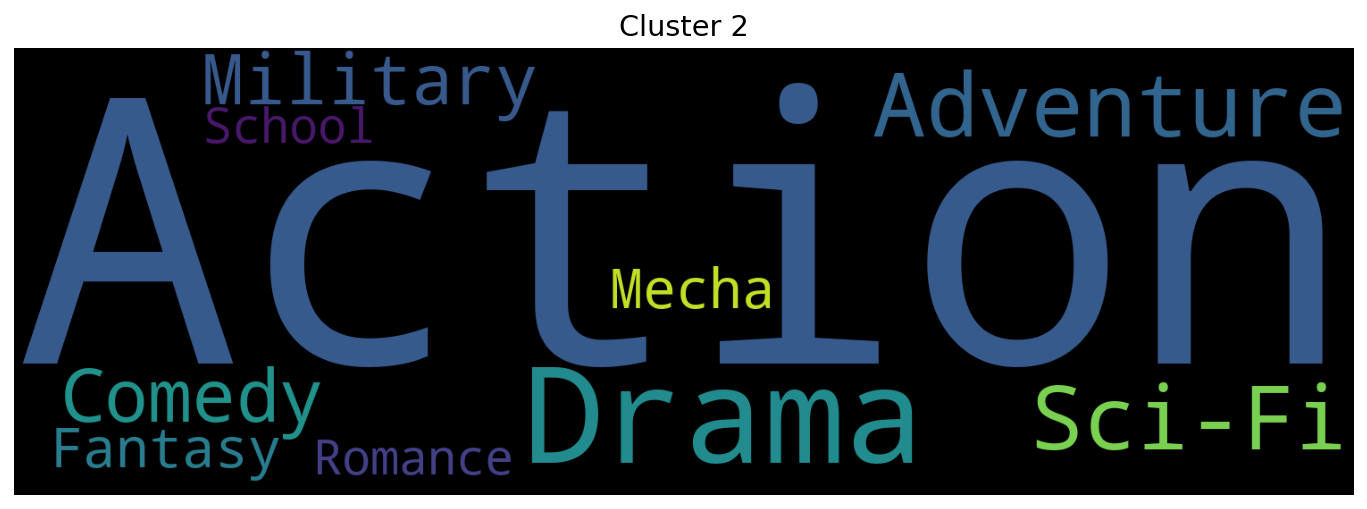

In [117]:
c2_animelist = list(c2.sort_values(ascending=False)[0:15].index)
c2_data = pd.DataFrame()
c2_data['genre'],c2_data['episode'],c2_data['rating'],c2_data['member'] =  createAnimeInfoList(c2_animelist)
c2_data.iloc[:,1:4] = c2_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c2_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"Cluster 2","black")

In [118]:
keyword_occurences[0:5]

[['Action', 10],
 [' Drama', 8],
 [' Adventure', 6],
 [' Sci-Fi', 6],
 [' Comedy', 4]]

In [119]:
print('Cluster 2\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c2_data['episode'].mean(), c2_data['rating'].mean(),c2_data['member'].mean()))

Cluster 2
AVG episode : 24.133333333333333
AVG movie rating : 8.0
AVG member : 561513.7333333333


#### Cluster 3

In [120]:
c3.sort_values(ascending=False)[0:15]

name
Shingeki no Kyojin                                          0.726753
No Game No Life                                             0.644598
Sword Art Online                                            0.613602
Angel Beats!                                                0.598255
Death Note                                                  0.591032
Steins;Gate                                                 0.551610
Fullmetal Alchemist: Brotherhood                            0.539874
Toradora!                                                   0.517605
Mirai Nikki (TV)                                            0.513993
Code Geass: Hangyaku no Lelouch                             0.506169
Code Geass: Hangyaku no Lelouch R2                          0.478182
Noragami                                                    0.464941
One Punch Man                                               0.464039
Tokyo Ghoul                                                 0.462534
Ano Hi Mita Hana no Namae wo 

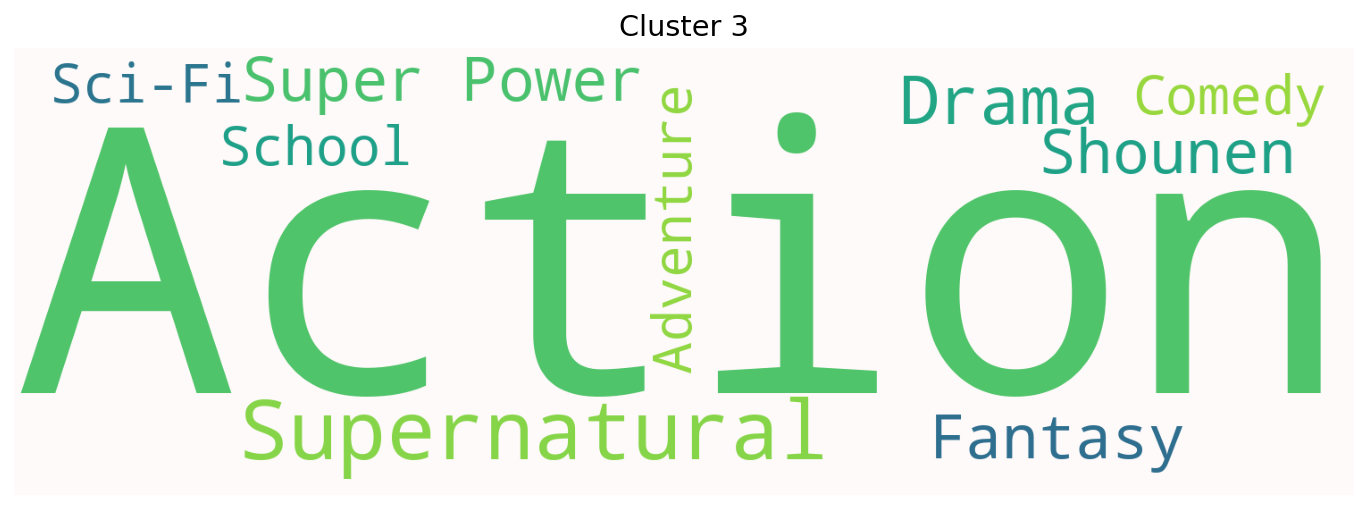

In [121]:
c3_animelist = list(c3.sort_values(ascending=False)[0:15].index)
c3_data = pd.DataFrame()
c3_data['genre'],c3_data['episode'],c3_data['rating'],c3_data['member'] =  createAnimeInfoList(c3_animelist)
c3_data.iloc[:,1:4] = c3_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c3_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"Cluster 3","snow")

In [122]:
keyword_occurences[0:5]

[['Action', 10],
 [' Supernatural', 8],
 [' Drama', 5],
 [' Shounen', 4],
 [' Fantasy', 4]]

In [123]:
print('Cluster 3\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c3_data['episode'].mean(), c3_data['rating'].mean(),c3_data['member'].mean()))

Cluster 3
AVG episode : 23.2
AVG movie rating : 8.066666666666666
AVG member : 687956.2


 Thank you for read till the end.
    After this work, we can use cluster feature for recommend some anime
    that suit with character of each cluster.
    Apart from content and collaborative recommendation,
    This is an alternative method for giving a differences taste of recommendation to user. 